In [33]:
import numpy as np 
import pandas as pd 
from PIL import Image

import cv2
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from architecture import *


In [34]:
def findFace(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    faceArray = np.asarray(image)
    plt.imshow(faceArray)
    plt.show()
    return faceArray

In [35]:
faceNetModel = InceptionResNetV2()
path = "./facenet_keras_weights.h5"
faceNetModel.load_weights(path)
print(faceNetModel.inputs)
print(faceNetModel.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_42')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


1/1 [==============================] - 0s 145ms/step


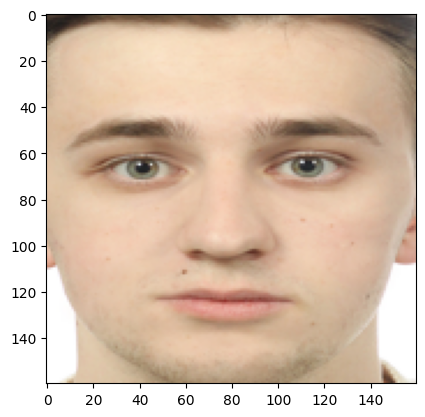

2023-06-11 15:27:49.390668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1,160,160,3]
	 [[{{node Placeholder/_0}}]]


In [36]:
def imgToEmbedding(model, filename):
    face = findFace(filename)
    img = np.around(np.array(face) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

myPhoto = imgToEmbedding(faceNetModel, "./dataset/ostap.jpg")


In [37]:
def verify(imagePath, embedding, model):
    encoding = imgToEmbedding(model, imagePath)

    dist = np.linalg.norm(encoding - embedding)
    
    return dist

1/1 [==============================] - 0s 195ms/step


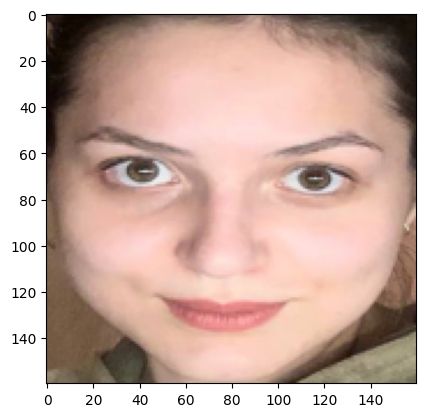

1.2989858


2023-06-11 15:44:05.933172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1,160,160,3]
	 [[{{node Placeholder/_0}}]]


In [41]:
dist = verify("./dataset/iryna.jpg", myPhoto, faceNetModel)
print(dist)